In [126]:
# Initializing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import numpy.ndarray as nd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
#Resampling
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, classification_report

In [6]:
#bring in the file
df01 = pd.read_csv("framingham.csv")

df_original = df01.copy() # copying this data so there is no change on changing df01 in codes below

df01.head(6)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [7]:
df01.shape

(4238, 16)

In [8]:
df01.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#Renaming target variable to class
df01.rename(columns={'TenYearCHD':'risk'}, inplace=True)

In [10]:
#Missing values
df01.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
risk                 0
dtype: int64

In [11]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  risk             4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,risk
male,1.00,-0.03,0.02,0.20,0.32,-0.05,-0.00,0.01,0.02,-0.07,-0.04,0.06,0.08,-0.12,0.01,0.09
age,-0.03,1.00,-0.17,-0.21,-0.19,0.12,0.06,0.31,0.10,0.26,0.39,0.21,0.14,-0.01,0.12,0.23
education,0.02,-0.17,1.00,0.02,0.01,-0.01,-0.04,-0.08,-0.04,-0.02,-0.13,-0.06,-0.14,-0.05,-0.04,-0.05
currentSmoker,0.20,-0.21,0.02,1.00,0.77,-0.05,-0.03,-0.10,-0.04,-0.05,-0.13,-0.11,-0.17,0.06,-0.06,0.02
cigsPerDay,0.32,-0.19,0.01,0.77,1.00,-0.05,-0.03,-0.07,-0.04,-0.03,-0.09,-0.06,-0.09,0.08,-0.06,0.06
BPMeds,-0.05,0.12,-0.01,-0.05,-0.05,1.00,0.12,0.26,0.05,0.08,0.25,0.19,0.10,0.02,0.05,0.09
prevalentStroke,-0.00,0.06,-0.04,-0.03,-0.03,0.12,1.00,0.07,0.01,0.00,0.06,0.05,0.03,-0.02,0.02,0.06
prevalentHyp,0.01,0.31,-0.08,-0.10,-0.07,0.26,0.07,1.00,0.08,0.16,0.70,0.62,0.30,0.15,0.09,0.18
diabetes,0.02,0.10,-0.04,-0.04,-0.04,0.05,0.01,0.08,1.00,0.04,0.11,0.05,0.09,0.05,0.62,0.10
totChol,-0.07,0.26,-0.02,-0.05,-0.03,0.08,0.00,0.16,0.04,1.00,0.21,0.17,0.12,0.09,0.05,0.08


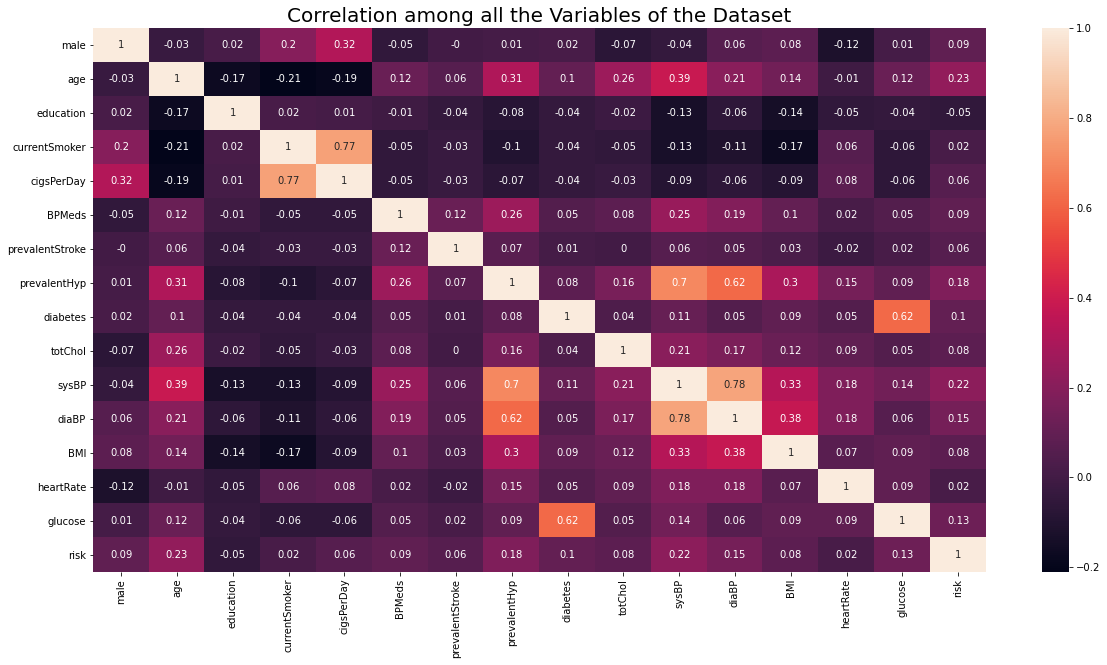

In [12]:
#creating a correlation matrix that measures the linear relationships between the variables
cor=df01.corr().round(2)
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

# Data cleaning steps

In [13]:
#Data imputation for 'glucose'

df01["glucose"].mean()

gluc_impute = df01.groupby('diabetes')['glucose'].median()
gluc_impute_0_diab = gluc_impute.loc[0]
gluc_impute_1_diab = gluc_impute.loc[1]

print(gluc_impute_0_diab)
print(gluc_impute_1_diab)

78.0
145.0


In [14]:
#Imputing 'Glucose' values with median based on Diabetes 1 or 0

df01.loc[(df01['diabetes']==0) & (df01['glucose'].isnull()),'glucose']= gluc_impute_0_diab
df01.loc[(df01['diabetes']==1) & (df01['glucose'].isnull()),'glucose']= gluc_impute_1_diab

print(df01.isnull().sum())
df_original.loc[[14,21,247]]
df01.loc[[14,21,247]] #This is to check from data if we our imputation worked or not. These index were NA before

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
risk                 0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,risk
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,78.0,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,78.0,0
247,0,40,2.0,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,145.0,1


In [15]:
#Data imputation for 'BMI'
#df01['BMI'].median()

df01["BMI"].fillna((df01["BMI"].median()), inplace=True)
print(df01.isnull().sum())
df_original.loc[[97,294]]


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
risk                 0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
97,0,40,2.0,0,0.0,0.0,0,0,0,205.0,100.0,60.0,NaN,60.0,72.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1


In [16]:
#Data imputation for 'totChol'

#df01['totChol'].median()

df01["totChol"].fillna((df01["totChol"].median()), inplace=True)
print(df01.isnull().sum())
df_original.loc[[42,154]]

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
risk                 0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
154,0,38,3.0,1,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0


In [17]:
#Data imputation for 'BPMeds'

#Whenever the sys and diastolic BP goes out of 160/95 then we assume that the patient must be taking BP meds

df01.loc[(df01['sysBP']>160) | (df01['diaBP']>95) & (df01['BPMeds'].isnull()),'BPMeds']= 1
df01.loc[(df01['sysBP']<=160) | (df01['diaBP']<=95) & (df01['BPMeds'].isnull()),'BPMeds']= 0

print(df01.isnull().sum())
df01.loc[df01['BPMeds'].isnull()]

df_original.loc[[1983]]

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
risk                 0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1983,0,63,2.0,0,0.0,NaN,0,1,0,283.0,164.0,86.0,24.64,80.0,82.0,0


In [18]:
#Data imputation for 'cigsPerDay'

cigsPerDay_impute = df01.groupby('currentSmoker')['cigsPerDay'].median()
cigsPerDay_impute_0_smoker = cigsPerDay_impute.loc[0]
cigsPerDay_impute_1_smoker = cigsPerDay_impute.loc[1]

print(cigsPerDay_impute_0_smoker)
print(cigsPerDay_impute_1_smoker)

0.0
20.0


In [19]:
df01.loc[(df01['currentSmoker']==0) & (df01['cigsPerDay'].isnull()),'cigsPerDay']= cigsPerDay_impute_0_smoker
df01.loc[(df01['currentSmoker']==1) & (df01['cigsPerDay'].isnull()),'cigsPerDay']= cigsPerDay_impute_1_smoker

print(df01.isnull().sum())
df_original.loc[[131,139]]

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose              0
risk                 0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1


In [20]:
#Data imputation for 'heartRate'

#df01['heartRate'].median()

df01["heartRate"].fillna((df01["heartRate"].median()), inplace=True)
print(df01.isnull().sum())
df_original.loc[[689]]

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
risk                 0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [21]:
#Data imputation for 'education'

#df01['education'].median()

df01["education"].fillna((df01["education"].median()), inplace=True)
print(df01.isnull().sum())
df_original.loc[[33,36]]

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
risk               0
dtype: int64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0


In [22]:
# Dropping 'Education' column as it is uncorrelated from other feature and does not 
#provide any business context to the problem

df01=df01.drop(['education'], axis=1)

In [23]:
df01.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
risk               0
dtype: int64

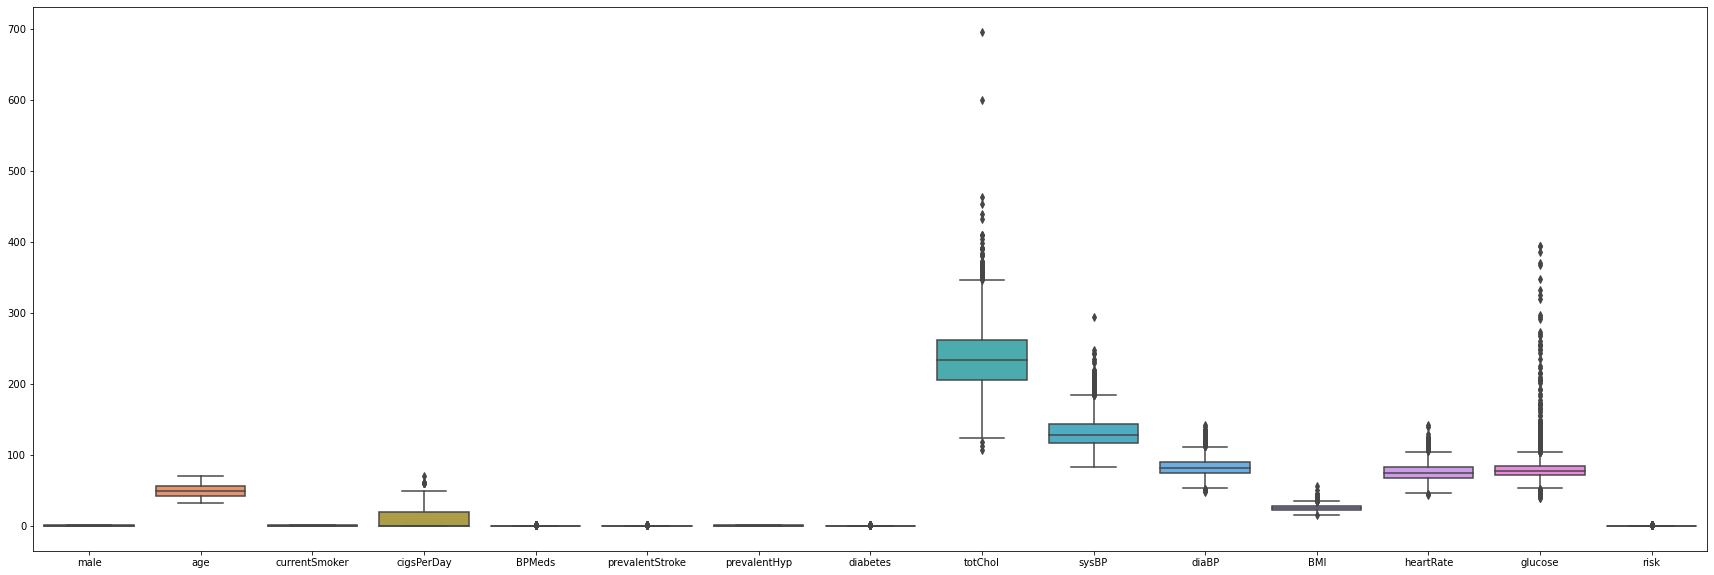

In [24]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df01)
plt.show()

# Final Cleaned Data

In [25]:
df_clean = df01

df_clean.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
risk               0
dtype: int64

# Perform EDA Here

In [28]:
categorsizations = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','male','risk']

In [125]:
for atribute in categorsizations:
    print(atribute)
    print(df_clean[atribute].value_counts())
    print("*************************")

currentSmoker
0    2144
1    2094
Name: currentSmoker, dtype: int64
*************************
BPMeds
0.0    3787
1.0     451
Name: BPMeds, dtype: int64
*************************
prevalentStroke
0    4213
1      25
Name: prevalentStroke, dtype: int64
*************************
prevalentHyp
0    2922
1    1316
Name: prevalentHyp, dtype: int64
*************************
male
0    2419
1    1819
Name: male, dtype: int64
*************************
risk
0    3594
1     644
Name: risk, dtype: int64
*************************


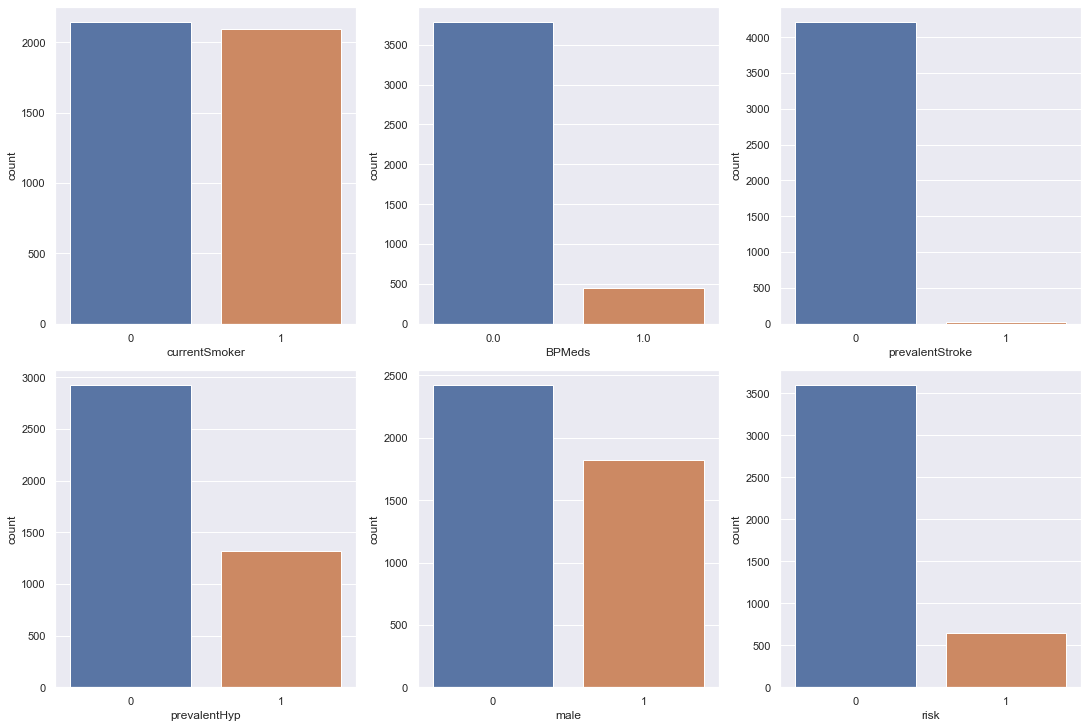

In [33]:
number_plots = len(categorsizations)
total_columns = 3
total_rows = int(number_plots/total_columns)
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(nrows=total_rows, ncols=total_columns,
                        figsize=(5*total_columns, 5*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorsizations):
    row = i//total_columns
    pos = i % total_columns
    plot = sns.countplot(x=var, data=df_clean, ax=axs[row][pos])

In [105]:
df_clean.groupby('risk')['age','cigsPerDay','totChol','sysBP','diaBP','BMI', 'glucose'].mean()


risk
0    3594
1     644
Name: diabetes, dtype: int64

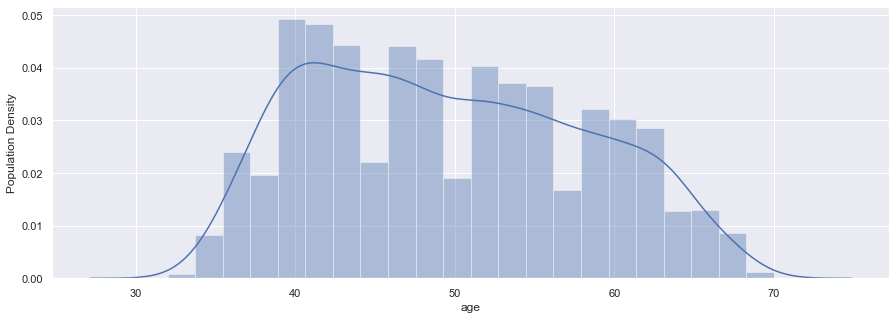

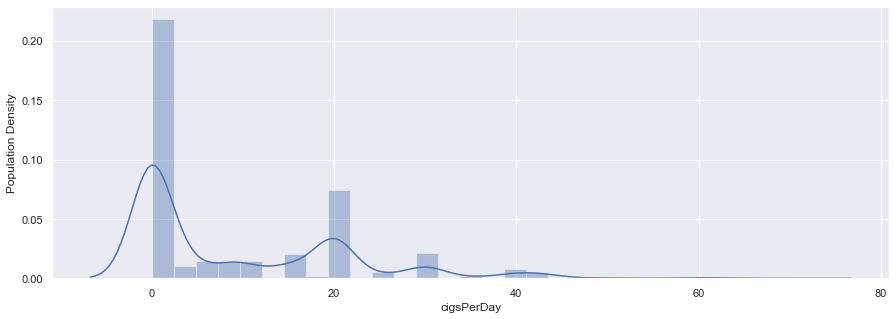

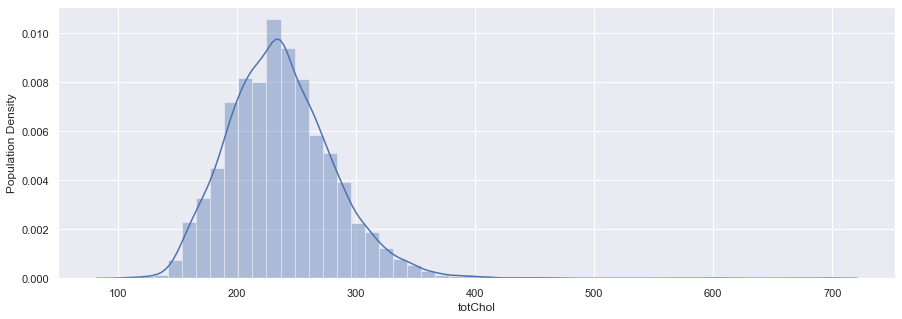

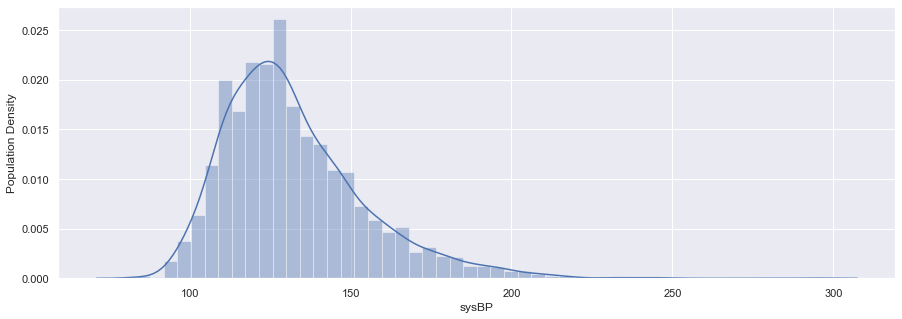

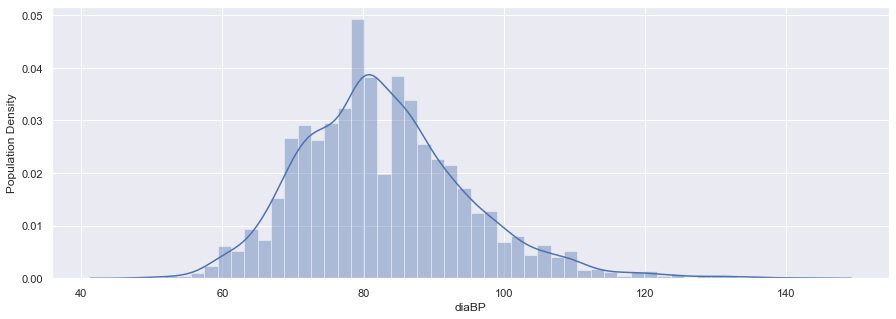

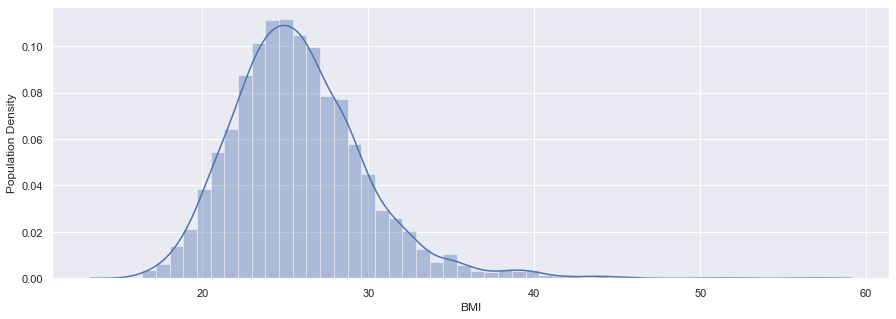

In [32]:
values = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI']

for value in values:
    plt.figure(figsize=(15, 5), facecolor='w')
    sns.distplot(df_clean[value],norm_hist='false')
    plt.title(''.format(value), fontsize=25)
    plt.ylabel('Population Density')
    plt.show()


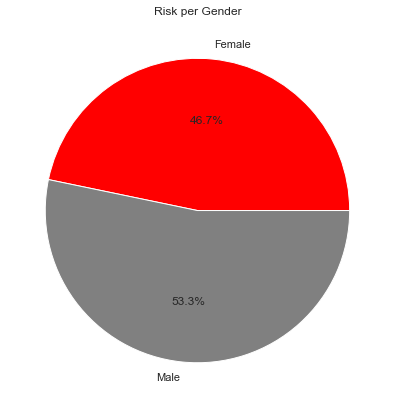

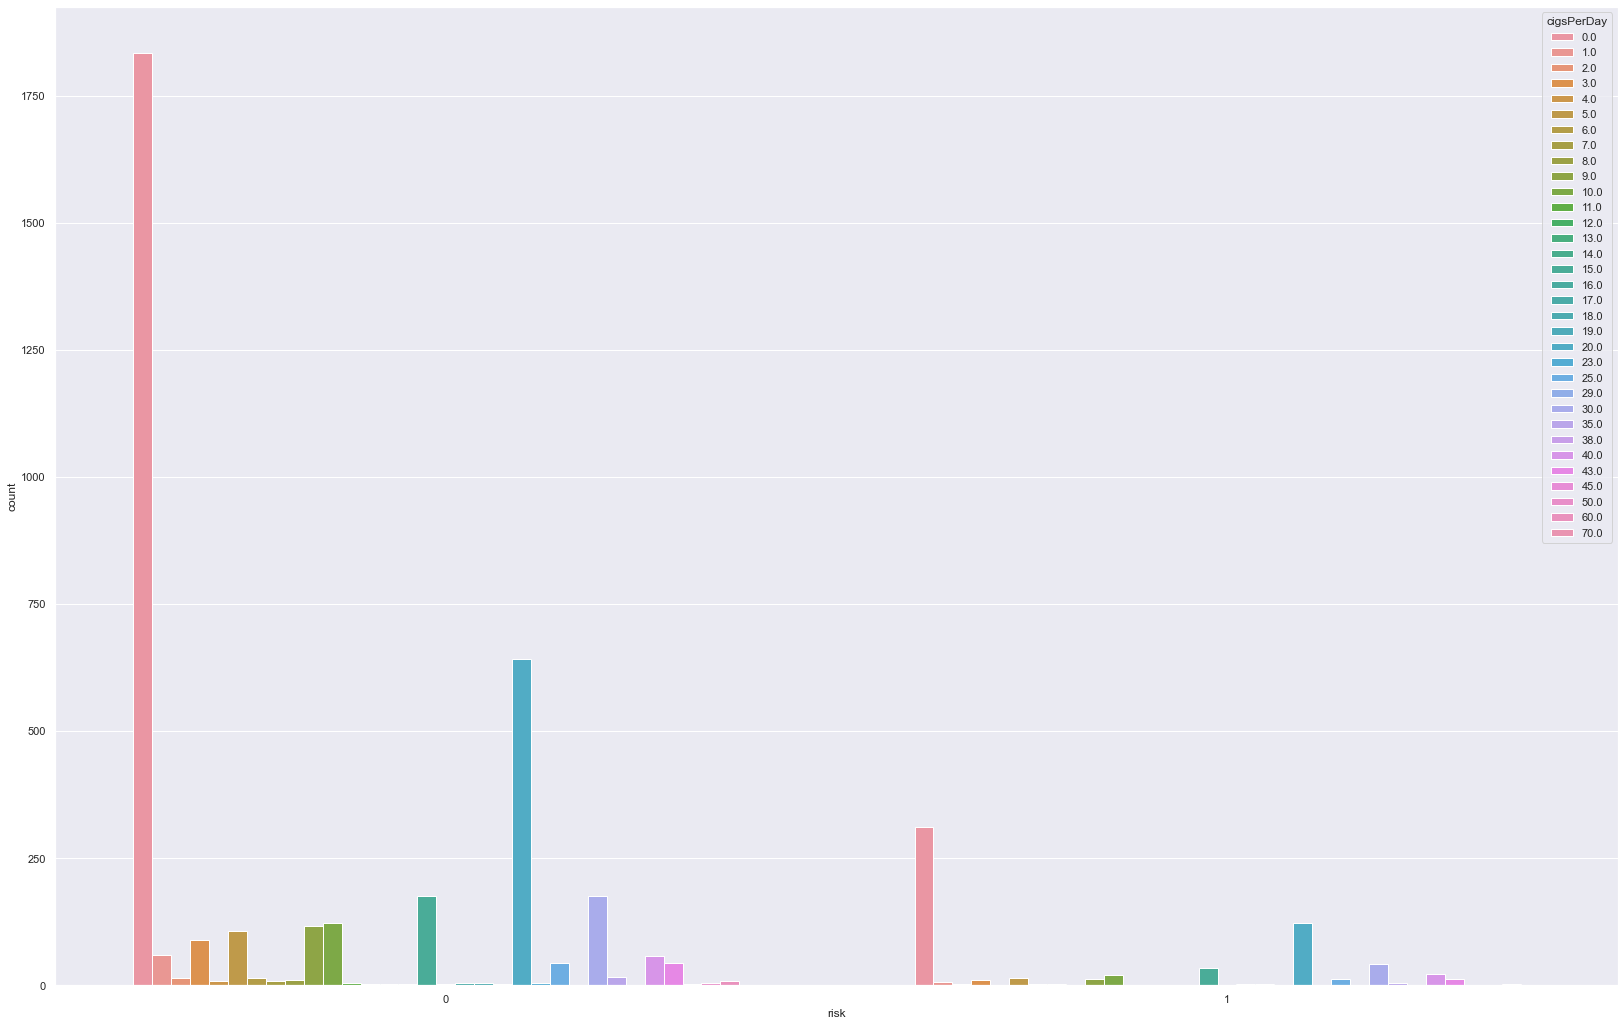

In [32]:
segregation = df_clean.groupby("male", as_index=False).risk.sum()
#print(segregation)
gender=['Female','Male']
plt.figure(figsize=(15, 7), facecolor='w')
plt.pie(segregation["risk"],autopct="%1.1f%%",labels=gender,colors=["red","grey"])
plt.title('Risk per Gender')
plt.show()

#age_seg = df_clean.groupby("age", as_index=False).risk.sum()
#plt.figure(figsize=(15, 7), facecolor='w')
#plt.pie(segregation["risk"],autopct="%1.1f%%",labels=segregation['age'],colors=["red","grey"])
#plt.title('Risk per Age')
#plt.show()

plt.figure(figsize=(28, 18), facecolor='w')
sns.countplot(x="risk",data=df_clean,hue="cigsPerDay")
plt.show()



Text(0, 0.5, 'Risk')

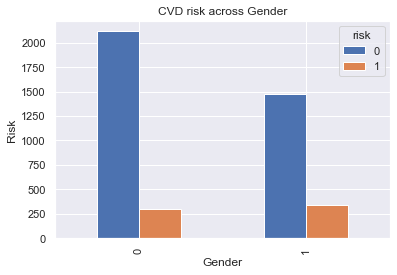

In [46]:
%matplotlib inline
pd.crosstab(df_clean.male,df_clean.risk).plot(kind='bar')
plt.title('CVD risk across Gender')
plt.xlabel('Gender')
plt.ylabel('Risk')

# Modeling the data

Text(0.5, 1.0, 'Before Resampling')

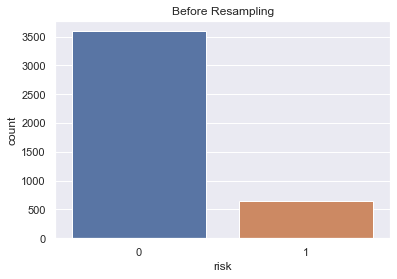

In [127]:
#sns.set_theme(style="darkgrid")
bx = sns.countplot(x='risk', data=df_clean)
#plt.subplots_adjust(right=1.5)
plt.title('Before Resampling')


In [128]:
X=df_clean.iloc[:,0:14]
y=df_clean.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)
best=SelectKBest(score_func=chi2, k=10)
fit=best.fit(X,y)

X



X -  (4238, 14) 
y -  (4238,)


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,1.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0


In [129]:
score_values=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)
effect = pd.concat([data_columns, score_values],axis=1)
effect.columns = ['Column','Relevance']
print(effect.nlargest(5,'Relevance'))



        Column   Relevance
9        sysBP  728.292522
13     glucose  416.793843
1          age  318.597444
8      totChol  234.012936
3   cigsPerDay  208.834362


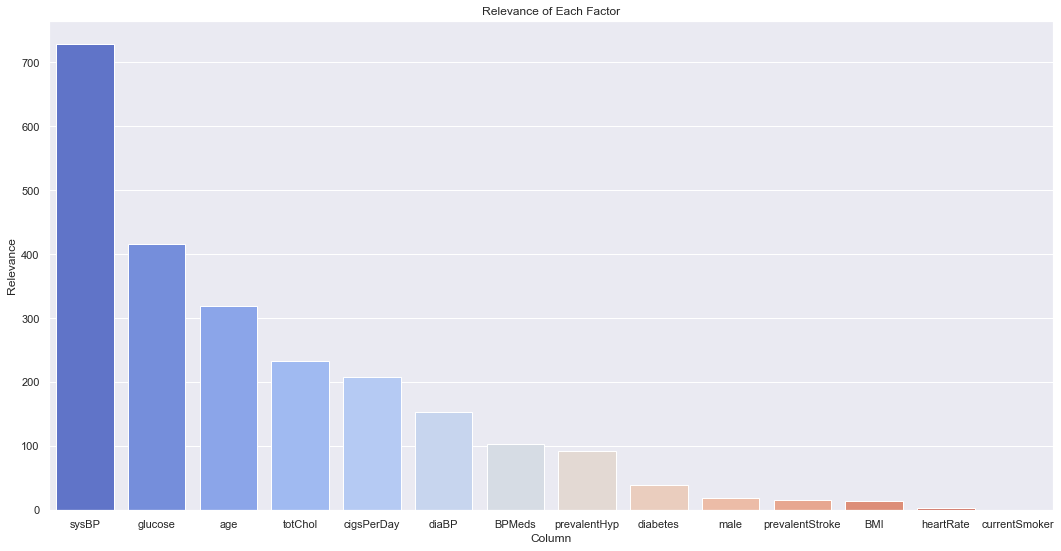

In [123]:
effect=effect.sort_values(by='Relevance',ascending=False)
plt.figure(figsize=(18, 9), facecolor='w')
plt.title('Relevance of Each Factor')
#one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
sns.barplot(x='Column',y='Relevance', data=effect,palette='coolwarm')
plt.show()

In [131]:
cols=['male','age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate', 'prevalentStroke', 'currentSmoker'
         ,'glucose', 'prevalentHyp', 'diabetes', 'BPMeds'] 
#X = df_clean.drop(‘risk’, axis = 1)
X=df_clean[cols]
y=df_clean['risk']

In [120]:
#Implementing the model

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.396340
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.070     
Dependent Variable: risk             AIC:              3387.3753 
Date:               2021-10-03 02:52 BIC:              3476.3011 
No. Observations:   4238             Log-Likelihood:   -1679.7   
Df Model:           13               LL-Null:          -1805.8   
Df Residuals:       4224             LLR p-value:      2.2632e-46
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
male               0.3891   0.0973  3.9987 0.0001  0.1984  0.5799
age                0.0344   0.0056  6.1728 0.0000  0.0235  0.0453


In [159]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression(class_weight='balanced')
logreg = LogisticRegression(class_weight={0: 0.12, 1: 0.88})
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.12, 1: 0.88})

In [160]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('The f1 score for the model model is:',f1_score(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.59
The f1 score for the model model is: 0.3616504854368932


In [163]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[597 477]
 [ 49 149]]


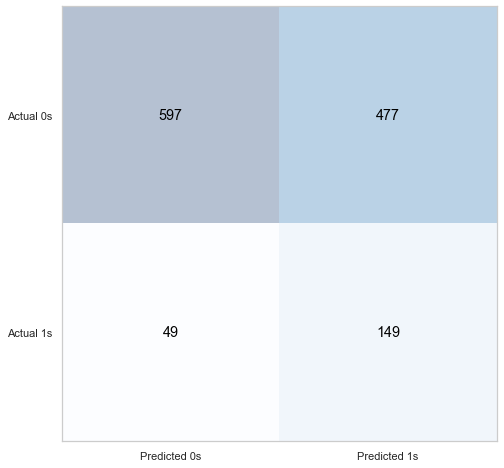

In [164]:
# Plotting Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black', size='x-large')
plt.show()

In [145]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1074
           1       0.27      0.68      0.38       198

    accuracy                           0.66      1272
   macro avg       0.59      0.67      0.57      1272
weighted avg       0.82      0.66      0.70      1272



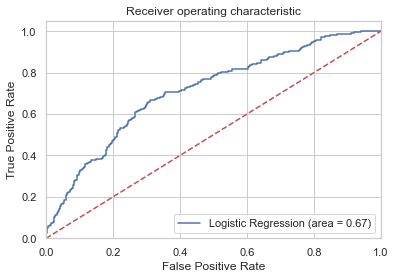

In [146]:
#ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

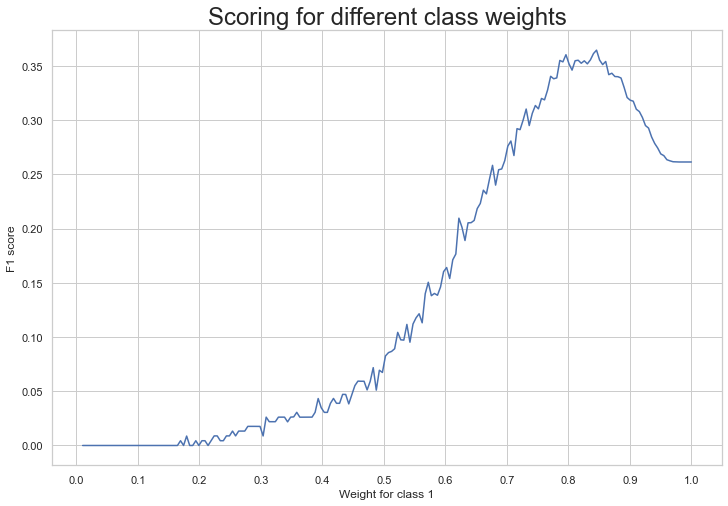

In [136]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression()

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)